### Read data (wav)
First read in high cavitation files.

In [1]:
from pathlib import Path
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
def read_wav(dataset_names):
    samplerate = []
    df = []
    for data in dataset_names:
        path =  Path.cwd()/"data"
        sf, d = wavfile.read(path/data)
        samplerate.append(sf)
        df.append(d)
    return samplerate , df

In [3]:
datasets = ["s00000_191115_007_KesselpumpHD02_002_RP1_FC_01_P06_SB1_L0_KS_XXXX_YY_YYYY_ZZZZZZ_16.wav"]
#,"sxmany_200206_007_HKMNetzpumpe04_004_RP1_FC_01_C06_SB1_L0_XX_XXXX_YY_YYYY_ZZZZZZ_10.wav"
sr, df = read_wav(datasets)

C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


## Splitting

Splitting the data in 2 second samples

In [4]:

def splitting (sr, df, sec):
    #get sr for section
    seg_len = int(sr * sec)

    splits = []

    for data in df:
        #get number of sections
        sections = int(np.ceil(len(data) / seg_len))
        for i in range(sections):
            #slice section range
            t = data[i * seg_len: (i + 1) * seg_len]
            splits.append(t)


    return splits

In [5]:
df_split = splitting(sr[0],df, 1)

In [6]:
df_split

[array([ 133., 2008.,  909., ..., 4752., 1082., -561.], dtype=float32),
 array([ -222.,  -389., -3966., ...,  3011., -1090., -3151.], dtype=float32),
 array([ -7008., -11294., -10281., ..., -10713.,  -7686.,   -586.],
       dtype=float32),
 array([ 7773., 11353.,  6606., ...,  -945., -2227., -2479.], dtype=float32),
 array([ -7246., -10567.,  -6030., ...,   6664.,   9614.,   6304.],
       dtype=float32),
 array([ 1553.,  -702., -1371., ...,  3361.,  2102.,  -871.], dtype=float32),
 array([-3873., -3091., -5118., ...,  5502.,  -540., -5745.], dtype=float32),
 array([-10082., -10257.,  -7002., ...,    986.,   1313.,    437.],
       dtype=float32),
 array([-1555., -2960., -2002., ..., -1487., -7882., -9647.], dtype=float32),
 array([-6543., -6708., -5260., ...,   988.,  4185.,  9247.], dtype=float32),
 array([ 7411.,   687., -6734., ...,   857.,  -887., -1447.], dtype=float32),
 array([ -2107.,  -2305.,  -5049., ..., -10500.,  -6627.,   -732.],
       dtype=float32),
 array([ 3594.,  4

## Fourier Transformation

Transform data into frequency domain.

In [7]:
from scipy.fftpack import fft, ifft

def fourier_trans(sr, data):
    df_ftt = []
    freq = []

    df = pd.DataFrame()
    x = 0
    for i in data:

        length = i.shape[0] / sr
        N = i.shape[0]
        n = np.arange(N)
        freq.append(n/length)
        df_i = pd.DataFrame(fft(i).real, columns = [x])
        x += 1
        df = pd.concat([df,df_i], axis = 1)

    return freq, df

In [8]:
freq, df_fft = fourier_trans(sr[0],df_split)

In [9]:
df_fft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,19071.000000,5141.000000,-34349.000000,30656.000000,-513.000000,400.000000,6398.000000,-13034.000000,-2897.000000,10212.000000,-6592.000000,-17912.000000,12722.000000,4212.000000,15227.000000,-12504.000000,-1985.000000,-7202.000000,2426.000000,8777.000000
1,19093.173828,5289.685547,-34628.261719,30817.953125,-413.034180,64.886475,6539.176270,-13122.257812,-2647.667480,9989.706055,-6497.345703,-17600.183594,12712.310547,4167.133789,14837.760742,-12682.062500,-2049.658203,-7411.288574,2688.912109,8872.757812
2,19179.093750,5145.678223,-34629.593750,30692.207031,-176.060547,178.049683,6742.463379,-13324.482422,-2718.546631,9983.959961,-6435.954102,-17571.748047,12555.228516,4434.281738,14993.858398,-12747.450195,-1977.096191,-7124.540039,2788.823730,8841.103516
3,19173.091797,5127.064941,-34667.054688,30698.093750,-435.553955,183.742432,6510.910156,-13017.246094,-2506.540283,9847.266602,-6505.699707,-17642.421875,12548.259766,4069.319336,14923.116211,-12627.946289,-1995.334473,-7709.329590,2638.404053,8760.528320
4,19182.296875,5288.978027,-34572.914062,31036.111328,-440.333374,40.684326,6677.865234,-13349.007812,-2702.960693,10116.700195,-6490.904785,-17750.703125,12493.661133,4237.856445,14874.955078,-12823.578125,-1973.034668,-7233.260254,2538.644287,8717.990234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255995,19163.554688,5203.730957,-34699.195312,30716.000000,-449.495117,-31.591675,6546.589844,-13111.677734,-2414.358643,9955.338867,-6700.813965,-17680.121094,12668.232422,4188.962402,14875.952148,-12666.001953,-1929.237305,-7553.932129,2474.891113,8710.720703
255996,19182.296875,5288.978027,-34572.914062,31036.111328,-440.333374,40.684326,6677.865234,-13349.007812,-2702.960693,10116.700195,-6490.904785,-17750.703125,12493.661133,4237.856445,14874.955078,-12823.578125,-1973.034668,-7233.260254,2538.644287,8717.990234
255997,19173.091797,5127.064941,-34667.054688,30698.093750,-435.553955,183.742432,6510.910156,-13017.246094,-2506.540283,9847.266602,-6505.699707,-17642.421875,12548.259766,4069.319336,14923.116211,-12627.946289,-1995.334473,-7709.329590,2638.404053,8760.528320
255998,19179.093750,5145.678223,-34629.593750,30692.207031,-176.060547,178.049683,6742.463379,-13324.482422,-2718.546631,9983.959961,-6435.954102,-17571.748047,12555.228516,4434.281738,14993.858398,-12747.450195,-1977.096191,-7124.540039,2788.823730,8841.103516


In [10]:
def plot_whole_freq(frequency, spectrum):

    plt.figure(figsize = (12, 6))
    plt.subplot(121)

    plt.stem(frequency[1], np.abs(spectrum), 'b', \
             markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')

    plt.show()

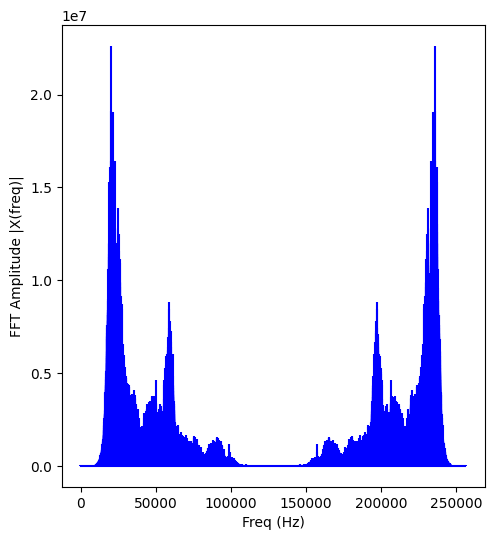

In [11]:
plot_whole_freq(freq,df_fft[0])

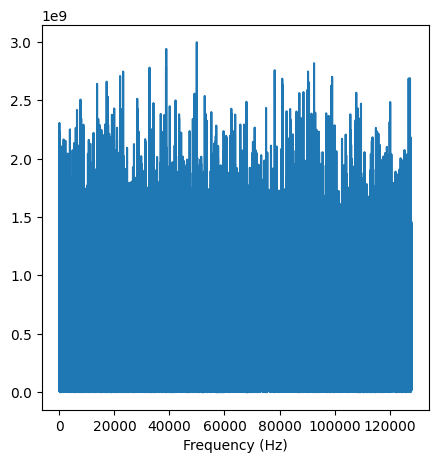

In [12]:
def plot_half_freq(frequency, spectrum):

    X = np.fft.fft(spectrum)
    X_mag = np.abs(X)
    f = np.linspace(0, sr[0], len(X_mag))
    half = int(len(X_mag)/2)
    fft_fre = np.fft.rfftfreq(len(X_mag), d=1./frequency)

    abs_spec = abs(X_mag[:half+1])
    plt.figure(figsize=(5, 5))
    plt.plot(fft_fre, abs_spec) # magnitude spectrum
    plt.xlabel('Frequency (Hz)')
    plt.show()

plot_half_freq(sr[0],df_fft[0])

## Feature extraction and labels

Extract statistical features and add a label.

In [13]:
import os
import scipy.io as scio
from scipy.stats import norm, kurtosis, skew
import pandas as pd
import math
import csv
'''
1. Central Trend Statistics:
   --- mean
   --- median
   --- low quartile
   --- upper quartile
2. Dispersion Degree Statistics:
   --- minimum
   --- maximum
   --- inter quartile range
   --- standard deviation
   --- root mean square
   --- square root amplitude
3. Distribution Shape Statistics
   --- kurtosis
   --- skewness
   --- shape factor
   --- clearance shape
   --- crest factor
'''


def feature_extraction(df, label):
    column_name = ["mean", "median", "quartile_25", "quartile_75", "Max", "Min", "quartile", "std", "rms", "sra", "ff", "clf", "cf", "kurtosis", "skew"]
    df_features = pd.DataFrame(columns = column_name) #

    for column in df:
        feature_list = []

           # central trend statistics
        data_mean = np.mean(df[column])
        data_median = np.median(df[column])
        data_quartile_025 = np.quantile(df[column], 0.25)
        data_quartile_075 = np.quantile(df[column], 0.75)

           # dispersion degree statistics
        data_Minimum = np.min(df[column])
        data_Maximum = np.max(df[column])
        data_quartile = data_quartile_075 - data_quartile_025
        data_std = np.std(df[column])
        data_rms = np.sqrt((np.mean(df[column]**2)))
        data_sra = (np.sum(np.sqrt(np.abs(df[column])))/len(df[column]))**2

           # distribution shape statistics
        data_kurtosis = kurtosis(df[column])
        data_skew = skew(df[column])

        data_avg = np.mean(np.abs(df[column]))
        data_ff = data_rms / data_avg

        data_clf = np.max(np.abs(df[column])) / data_sra
        data_cf = np.max(np.abs(df[column])) / data_rms

        feature_list = [data_mean, data_median, data_quartile_025, data_quartile_075, data_Maximum, data_Minimum, data_quartile, data_std, data_rms, data_sra, data_ff, data_clf, data_cf , data_kurtosis, data_skew]
        feature_list = pd.DataFrame(data=feature_list).T #,
        feature_list.columns = column_name

        df_features = pd.concat([df_features,feature_list])

    if label == "Cavitation":
        df_features["Cavitation"] = 1

    if label == "No Cavitation":
        df_features["Cavitation"] = 0

    if label != "No Cavitation" and label != "Cavitation":
        df_features["Cavitation"] = label
    return df_features











In [14]:
df_fft

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,19071.000000,5141.000000,-34349.000000,30656.000000,-513.000000,400.000000,6398.000000,-13034.000000,-2897.000000,10212.000000,-6592.000000,-17912.000000,12722.000000,4212.000000,15227.000000,-12504.000000,-1985.000000,-7202.000000,2426.000000,8777.000000
1,19093.173828,5289.685547,-34628.261719,30817.953125,-413.034180,64.886475,6539.176270,-13122.257812,-2647.667480,9989.706055,-6497.345703,-17600.183594,12712.310547,4167.133789,14837.760742,-12682.062500,-2049.658203,-7411.288574,2688.912109,8872.757812
2,19179.093750,5145.678223,-34629.593750,30692.207031,-176.060547,178.049683,6742.463379,-13324.482422,-2718.546631,9983.959961,-6435.954102,-17571.748047,12555.228516,4434.281738,14993.858398,-12747.450195,-1977.096191,-7124.540039,2788.823730,8841.103516
3,19173.091797,5127.064941,-34667.054688,30698.093750,-435.553955,183.742432,6510.910156,-13017.246094,-2506.540283,9847.266602,-6505.699707,-17642.421875,12548.259766,4069.319336,14923.116211,-12627.946289,-1995.334473,-7709.329590,2638.404053,8760.528320
4,19182.296875,5288.978027,-34572.914062,31036.111328,-440.333374,40.684326,6677.865234,-13349.007812,-2702.960693,10116.700195,-6490.904785,-17750.703125,12493.661133,4237.856445,14874.955078,-12823.578125,-1973.034668,-7233.260254,2538.644287,8717.990234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255995,19163.554688,5203.730957,-34699.195312,30716.000000,-449.495117,-31.591675,6546.589844,-13111.677734,-2414.358643,9955.338867,-6700.813965,-17680.121094,12668.232422,4188.962402,14875.952148,-12666.001953,-1929.237305,-7553.932129,2474.891113,8710.720703
255996,19182.296875,5288.978027,-34572.914062,31036.111328,-440.333374,40.684326,6677.865234,-13349.007812,-2702.960693,10116.700195,-6490.904785,-17750.703125,12493.661133,4237.856445,14874.955078,-12823.578125,-1973.034668,-7233.260254,2538.644287,8717.990234
255997,19173.091797,5127.064941,-34667.054688,30698.093750,-435.553955,183.742432,6510.910156,-13017.246094,-2506.540283,9847.266602,-6505.699707,-17642.421875,12548.259766,4069.319336,14923.116211,-12627.946289,-1995.334473,-7709.329590,2638.404053,8760.528320
255998,19179.093750,5145.678223,-34629.593750,30692.207031,-176.060547,178.049683,6742.463379,-13324.482422,-2718.546631,9983.959961,-6435.954102,-17571.748047,12555.228516,4434.281738,14993.858398,-12747.450195,-1977.096191,-7124.540039,2788.823730,8841.103516


In [15]:
data_std = np.std(df_fft[0])

data_rms = np.sqrt((np.mean(df_fft[0]**2)))
data_sra = (np.sum(np.sqrt(np.abs(df_fft[0])))/len(df_fft[0]))**2

In [16]:
h_c_df = feature_extraction(df_fft, "Cavitation")

In [17]:
h_c_df

,mean,median,quartile_25,quartile_75,Max,Min,quartile,std,rms,sra,ff,clf,cf,kurtosis,skew,Cavitation
0,132.999939,5125.717773,-186619.554688,188098.558594,22628324.0,-16473818.0,374718.113281,1338048.375,1338048.375,332413.794224,2.150615,68.072759,16.911440,20.642856,0.042880,1
0,-221.999054,4317.141113,-191900.425781,187638.832031,18148844.0,-18371788.0,379539.257812,1373984.750,1373984.750,332235.302852,2.154837,55.297519,13.371173,19.862270,-0.018263,1
0,-7008.000977,-9464.326172,-198913.824219,188372.183594,18738612.0,-17057312.0,387286.007812,1390564.000,1390581.625,349908.628196,2.146276,53.552872,13.475377,19.875391,0.049199,1
0,7773.000000,6992.319824,-186983.222656,200796.222656,18166504.0,-18051740.0,387779.445312,1390756.375,1390778.000,347284.950154,2.148971,52.310081,13.062117,20.148841,-0.005838,1
0,-7246.000488,-823.357422,-209214.546875,188527.863281,19387884.0,-17455274.0,397742.410156,1451683.750,1451701.750,340991.179080,2.187088,56.857436,13.355281,21.403290,0.100190,1
0,1553.000732,2075.617676,-202292.375000,204708.347656,24401804.0,-19217512.0,407000.722656,1569998.750,1569999.375,352554.054847,2.251016,69.214362,15.542557,23.623902,0.008836,1
0,-3872.999512,4568.797852,-207491.605469,203715.601562,18801876.0,-23249420.0,411207.207031,1573524.750,1573529.375,358708.310737,2.247218,64.814278,14.775332,23.515066,-0.098629,1
0,-10082.000000,-5638.640625,-216123.625000,202159.488281,23960292.0,-20217122.0,418283.113281,1586034.500,1586066.625,369328.764038,2.230877,64.875239,15.106737,23.173603,-0.128512,1
0,-1555.000488,2597.000000,-202072.023438,214055.171875,20609756.0,-23046816.0,416127.195312,1611870.250,1611871.000,364817.736502,2.248344,63.173507,14.298177,23.598104,-0.253124,1
0,-6543.000000,-7463.250000,-213624.144531,201410.031250,24332520.0,-21321304.0,415034.175781,1604092.125,1604105.375,372015.062348,2.252881,65.407352,15.168903,24.711052,-0.078195,1


## Same procedure for non-cavitation data.

Load file

In [18]:
datasets = ["sxmany_200206_007_HKMNetzpumpe04_004_RP1_FC_01_C06_SB1_L0_XX_XXXX_YY_YYYY_ZZZZZZ_10.wav"]

sr, df = read_wav(datasets)

C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


### Split file

In [19]:
df_split = splitting(sr[0],df, 2)

### Fourier transformation

In [20]:
freq, df_ftt = fourier_trans(sr[0],df_split)

### Feature extraction and add labels

In [21]:
n_c_df = feature_extraction(df_ftt, "No_cavitation")

In [22]:
n_c_df

,mean,median,quartile_25,quartile_75,Max,Min,quartile,std,rms,sra,ff,clf,cf,kurtosis,skew,Cavitation
0,188.999969,285.617188,-47249.166992,47166.263672,3911730.00,-3661461.75,94415.430664,344376.28125,344376.34375,100944.548808,1.880099,38.751275,11.358881,8.673351,0.024364,No_cavitation
0,338.999817,442.606445,-50010.841797,50798.194336,3785041.25,-3834865.00,100809.036133,378136.12500,378136.31250,108410.954036,1.900190,35.373409,10.141488,9.288338,0.000133,No_cavitation
0,129.999954,116.105469,-49651.808594,50475.595703,3968321.25,-4272759.00,100127.404297,380878.37500,380878.37500,108591.544982,1.908602,39.347069,11.218172,9.769574,-0.027308,No_cavitation
0,-108.000008,-422.437500,-44462.881836,44095.830078,3280548.50,-3466732.00,88558.711914,325822.90625,325822.93750,93577.199859,1.908470,37.046759,10.639926,9.994113,-0.015095,No_cavitation
0,-486.000244,778.201172,-56428.169922,54220.079102,5136561.50,-4814440.00,110648.249023,444945.62500,444945.84375,125406.308389,1.921647,40.959355,11.544240,10.128421,0.016174,No_cavitation
0,-243.000031,-893.906250,-54796.658203,55363.051758,4646875.00,-5107823.00,110159.709961,411703.87500,411703.93750,120629.272148,1.897077,42.343147,12.406544,10.025000,0.029561,No_cavitation
0,141.999954,265.414062,-52241.909180,51704.750977,4342194.00,-4544057.50,103946.660156,403278.59375,403278.59375,113999.587863,1.907325,39.860298,11.267788,9.478155,0.014520,No_cavitation
0,-115.999985,736.753906,-53944.679688,54024.585938,4522007.50,-4376049.50,107969.265625,395293.18750,395293.18750,114491.338477,1.894048,39.496503,11.439630,9.425841,0.005057,No_cavitation
0,-369.999878,-646.807617,-45643.958008,44771.317383,4009059.25,-4061546.25,90415.275391,347869.31250,347869.53125,98666.054064,1.914248,41.164576,11.675488,9.878925,-0.009392,No_cavitation
0,-294.000122,-497.063477,-51091.940430,50301.433594,4094237.00,-4902808.00,101393.374023,385875.12500,385875.21875,111082.286592,1.893865,44.136722,12.705683,9.115134,0.015858,No_cavitation


### Combine both datasets

In [23]:
final_df = pd.concat([h_c_df, n_c_df])

In [24]:
final_df

,mean,median,quartile_25,quartile_75,Max,Min,quartile,std,rms,sra,ff,clf,cf,kurtosis,skew,Cavitation
0,132.999939,5125.717773,-186619.554688,188098.558594,22628324.00,-16473818.00,374718.113281,1.338048e+06,1.338048e+06,332413.794224,2.150615,68.072759,16.911440,20.642856,0.042880,1
0,-221.999054,4317.141113,-191900.425781,187638.832031,18148844.00,-18371788.00,379539.257812,1.373985e+06,1.373985e+06,332235.302852,2.154837,55.297519,13.371173,19.862270,-0.018263,1
0,-7008.000977,-9464.326172,-198913.824219,188372.183594,18738612.00,-17057312.00,387286.007812,1.390564e+06,1.390582e+06,349908.628196,2.146276,53.552872,13.475377,19.875391,0.049199,1
0,7773.000000,6992.319824,-186983.222656,200796.222656,18166504.00,-18051740.00,387779.445312,1.390756e+06,1.390778e+06,347284.950154,2.148971,52.310081,13.062117,20.148841,-0.005838,1
0,-7246.000488,-823.357422,-209214.546875,188527.863281,19387884.00,-17455274.00,397742.410156,1.451684e+06,1.451702e+06,340991.179080,2.187088,56.857436,13.355281,21.403290,0.100190,1
0,1553.000732,2075.617676,-202292.375000,204708.347656,24401804.00,-19217512.00,407000.722656,1.569999e+06,1.569999e+06,352554.054847,2.251016,69.214362,15.542557,23.623902,0.008836,1
0,-3872.999512,4568.797852,-207491.605469,203715.601562,18801876.00,-23249420.00,411207.207031,1.573525e+06,1.573529e+06,358708.310737,2.247218,64.814278,14.775332,23.515066,-0.098629,1
0,-10082.000000,-5638.640625,-216123.625000,202159.488281,23960292.00,-20217122.00,418283.113281,1.586034e+06,1.586067e+06,369328.764038,2.230877,64.875239,15.106737,23.173603,-0.128512,1
0,-1555.000488,2597.000000,-202072.023438,214055.171875,20609756.00,-23046816.00,416127.195312,1.611870e+06,1.611871e+06,364817.736502,2.248344,63.173507,14.298177,23.598104,-0.253124,1
0,-6543.000000,-7463.250000,-213624.144531,201410.031250,24332520.00,-21321304.00,415034.175781,1.604092e+06,1.604105e+06,372015.062348,2.252881,65.407352,15.168903,24.711052,-0.078195,1


In [25]:

def feature_pipe (datasets, splits_in_sec, label):
    sr, df = read_wav(datasets)
    df_split = splitting(sr[0],df, splits_in_sec)
    freq, df_ftt = fourier_trans(sr[0],df_split)
    output_df = feature_extraction(df_ftt, label)
    return len(df_split), output_df

In [26]:
No_cav_files = ["sxmany_200206_007_HKMNetzpumpe04_004_RP1_FC_01_C06_SB1_L0_XX_XXXX_YY_YYYY_ZZZZZZ_10.wav"]
cav_files = ["s00000_191115_007_KesselpumpHD02_002_RP1_FC_01_P06_SB1_L0_KS_XXXX_YY_YYYY_ZZZZZZ_16.wav"]


no_cav_df = feature_pipe(No_cav_files,0.1,"No Cavitation")[1]
cav_df = feature_pipe(cav_files,0.1,"Cavitation")[1]
final_df = pd.concat([no_cav_df, cav_df])
final_df.astype('float')

C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


,mean,median,quartile_25,quartile_75,Max,Min,quartile,std,rms,sra,ff,clf,cf,kurtosis,skew,Cavitation
0,188.999985,-346.398438,-10175.405273,9655.065430,636732.250,-5.432184e+05,19830.470703,69138.546875,69138.804688,19829.180510,1.890786,32.110871,9.209477,9.435697,0.111415,0.0
0,857.999939,676.756958,-9252.479492,9865.675293,579818.125,-4.631204e+05,19118.154785,66299.523438,66305.070312,19696.486031,1.873086,29.437643,8.744702,8.041750,0.168401,0.0
0,-214.999954,-413.046875,-15554.760986,14128.928711,1108530.375,-1.028691e+06,29683.689697,134435.593750,134435.765625,36059.243151,1.941522,30.741920,8.245800,9.401334,-0.015968,0.0
0,-311.999969,-44.036133,-8508.910645,8332.677002,546172.000,-5.955421e+05,16841.587646,62869.781250,62870.558594,16837.105111,1.978666,35.370815,9.472512,13.051699,-0.088088,0.0
0,-52.999985,410.257080,-6458.427734,7189.333984,369466.750,-2.471501e+05,13647.761719,32047.134766,32047.177734,10662.855499,1.810344,34.649888,11.528839,10.030529,0.053060,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1110.999023,2798.148438,-61784.951172,69072.613281,4297929.000,-3.934186e+06,130857.564453,457513.062500,457514.406250,116254.121163,2.147027,36.970122,9.394085,18.069592,0.250297,1.0
0,-3284.000732,-5751.750000,-70404.218750,57803.674805,4430649.000,-5.511242e+06,128207.893555,457417.406250,457429.187500,116867.031044,2.157737,47.158227,12.048295,20.967020,0.393933,1.0
0,4189.000488,3295.250977,-60473.977539,65948.023438,4125214.000,-4.619242e+06,126422.000977,440707.312500,440727.218750,113204.543023,2.135276,40.804387,10.480955,18.464533,-0.172874,1.0
0,4287.000000,994.078125,-56394.882812,67361.906250,4518601.000,-4.024674e+06,123756.789062,411929.625000,411951.937500,107671.347722,2.082933,41.966606,10.968758,17.227523,0.034508,1.0


XGBOOST


In [27]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

y = final_df["Cavitation"]
X = final_df.loc[:, final_df.columns != 'Cavitation'].astype('float')

X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3, random_state=1623806)



gbm_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3,10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}
#model = xgb.XGBClassifier()

model = xgb.XGBClassifier(silent=False,
                      scale_pos_weight=1,
                      learning_rate=0.01,
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic',
                      n_estimators=1000,
                      reg_alpha = 0.3,
                      max_depth=4,
                      gamma=10)
model.fit(X_train, y_train)
print(model)
predicted_y = model.predict(X_test)

[14:58:37] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=10, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              

In [28]:
pd.DataFrame({'Variable':X.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
9,sra,0.175304
8,rms,0.152863
3,quartile_75,0.130172
4,Max,0.128870
2,quartile_25,0.123222
6,quartile,0.108041
5,Min,0.105834
7,std,0.075695
0,mean,0.000000
1,median,0.000000


In [29]:
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
print(metrics.classification_report(y_test, predicted_y))
print(metrics.confusion_matrix(y_test, predicted_y))
precision,recall,fscore,support=score(y_test,predicted_y,average='macro')
eval= metrics.classification_report(y_test, predicted_y, output_dict=True)
eval['macro avg']['f1-score']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        57
           1       1.00      1.00      1.00        63

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[57  0]
 [ 0 63]]


1.0

In [30]:

def Classification_pipe (splits_in_sec, cavitation_data, no_cavitation_data,test_split_ratio ):

    non_cav_len, no_cav_df = feature_pipe(no_cavitation_data,splits_in_sec,"No Cavitation")
    cav_len, cav_df = feature_pipe(cavitation_data,splits_in_sec,"Cavitation")
    final_df = pd.concat([no_cav_df, cav_df])

    y = final_df["Cavitation"]
    X = final_df.loc[:, final_df.columns != 'Cavitation'].astype('float')


    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = test_split_ratio, random_state = 1623806)

    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    print(model)

    predicted_y = model.predict(X_test)
    print(metrics.classification_report(y_test, predicted_y))
    print(metrics.confusion_matrix(y_test, predicted_y))
    return metrics.confusion_matrix(y_test, predicted_y)

In [31]:
No_cav_files = ["sxmany_200206_007_HKMNetzpumpe04_004_RP1_FC_01_C06_SB1_L0_XX_XXXX_YY_YYYY_ZZZZZZ_10.wav"]
cav_files = ["s00000_191115_007_KesselpumpHD02_002_RP1_FC_01_P06_SB1_L0_KS_XXXX_YY_YYYY_ZZZZZZ_16.wav"]

Classification_pipe(1, cav_files, No_cav_files, 0.3)

C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         8

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      

array([[4, 0],
       [0, 8]], dtype=int64)

In [34]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
def Classification_pipe_Grid (splits_in_sec, cavitation_data, no_cavitation_data,test_split_ratio ):
    #read in files
    print(f'\n Reading in files, splitting in {splits_in_sec} second samples, transforming and extracting features')
    non_cav_len, no_cav_df = feature_pipe(no_cavitation_data,splits_in_sec,"No Cavitation")
    cav_len, cav_df = feature_pipe(cavitation_data,splits_in_sec,"Cavitation")
    final_df = pd.concat([no_cav_df, cav_df])
    length = cav_len + non_cav_len
    print(f'\n Done! We have {length} samples!')
    #y = final_df["Cavitation"]
    #X = final_df.loc[:, final_df.columns != 'Cavitation'].astype('float')
    #split in train test, keep for output

    train, test = train_test_split(final_df, test_size = test_split_ratio, random_state = 1623806)
    X_train = train.loc[:, final_df.columns != 'Cavitation'].astype('float')
    X_test = test.loc[:, final_df.columns != 'Cavitation'].astype('float')
    y_train = train["Cavitation"]
    y_test = test["Cavitation"]



    print(f'\n Train set: {len(train)} samples!')
    print(f'\n Test set: {len(test)} samples!')
    print('\n Starting Gridsearch, fine tuning parameters')
    model = xgb.XGBClassifier()
    #parameters for gridsearch
    param = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(100, 1000, 100),
    'learning_rate': [0.1, 0.01, 0.05]
}
    grid = GridSearchCV(model, param, n_jobs=5,
                    cv = 10,
                       #StratifiedKFold( n_splits=5, shuffle=True),
                       scoring='roc_auc', verbose=True, refit=True)

    grid.fit(X_train, y_train)
    #Output
    print('\n Best estimator:')
    print(grid.best_estimator_)
    print('\n  best_score_:')
    print(grid.best_score_)
    print('\n Best parameters:')
    print(grid.best_params_)

    predicted_y = grid.predict(X_test)

    print('\n Classification report on unseen test set:')
    print(metrics.classification_report(y_test, predicted_y))
    print('\n Confusion matrix on unseen test set')
    print(metrics.confusion_matrix(y_test, predicted_y))
    print(X_train.columns)
    print(grid.best_estimator_.feature_importances_)
    importance = pd.DataFrame({'Variable':X.columns,
              'Importance':grid.best_estimator_.feature_importances_}).sort_values('Importance', ascending=False)
    print('\n Feature importance:')
    print(importance)
    return train, test, grid.best_estimator_, importance
   # predicted_y = model.predict(X_test)
   # print(metrics.classification_report(y_test, predicted_y))
   # print(metrics.confusion_matrix(y_test, predicted_y))
   # return metrics.confusion_matrix(y_test, predicted_y)

In [35]:
train, test, best_model, x = Classification_pipe_Grid(1, cav_files, No_cav_files, 0.3)


 Reading in files, splitting in 1 second samples, transforming and extracting features


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)



 Done! We have 40 samples!

 Train set: 28 samples!

 Test set: 12 samples!

 Starting Gridsearch, fine tuning parameters
Fitting 10 folds for each of 216 candidates, totalling 2160 fits



KeyboardInterrupt



In [ ]:
best_model.predict(X_test)

In [ ]:

metrics.confusion_matrix(y_test, model.predict(X_test))

We only two datasets for each label which may be homogenous, especially the cavitation set.


In [36]:
def xg_boost_pipe(df,test_split, param, grid: bool = False):
    train, test = train_test_split(df, test_size = test_split, random_state = 1623806)
    X_train = train.loc[:, df.columns != 'Cavitation'].astype('float')
    X_test = test.loc[:, df.columns != 'Cavitation'].astype('float')
    y_train = train["Cavitation"]
    y_test = test["Cavitation"]
    print(f'\n Train set: {len(train)} samples!')
    print(f'\n Test set: {len(test)} samples!')

    if grid == True:
        model = xgb.XGBClassifier(objective = 'binary:logistic')
        print('\n Initiating Gridsearch, fine tuning parameters')
        grid = GridSearchCV(model, param, n_jobs=5,
                        cv = 10,
                           #StratifiedKFold( n_splits=5, shuffle=True),
                           scoring='roc_auc', verbose=True, refit=True)

        grid.fit(X_train, y_train)
        #Output
        print('\n Done!')
        print('\n Best estimator:')
        print(grid.best_estimator_)
        print('\n  best_score_:')
        print(grid.best_score_)
        print('\n Best parameters:')
        print(grid.best_params_)

        predicted_y = grid.predict(X_test)

        importance = pd.DataFrame({'Variable':X_train.columns,
                  'Importance':grid.best_estimator_.feature_importances_}).sort_values('Importance', ascending=False)
        print('\n Feature importance:')
        print(importance)

        return train, test, grid.best_estimator_, predicted_y, importance
    else:

        print(f'\n Train set: {len(train)} samples!,  Test set: {len(test)} samples!')
        model = xgb.XGBClassifier()
        model.fit(X_train, y_train)
        predicted_y = model.predict(X_test)
        evaluation = metrics.classification_report(y_test, predicted_y, output_dict=True)

        return train, test, model , predicted_y, evaluation


In [37]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

split_eval_list = np.arange(0.1,1,0.1)
def Classification_pipe_all (splits_in_sec, cavitation_data, no_cavitation_data,test_split_ratio, evaluation = "accuracy" , split_eval: bool = False):
    #read in files
    print(f'\n Reading in files, splitting in {splits_in_sec} second samples, transforming and extracting features')
    paramameter = {
            'max_depth': range (2, 10, 1),
            'n_estimators': range(100, 1000, 100),
            'learning_rate': [0.1, 0.01, 0.05]
        }
    if split_eval == True:
        print(f"splitting evaluation is set to true, range is {splits_in_sec}")
        print(f"\n Evaluation method is {evaluation}")
        f1_result = []
        acc_result = []
        sample_size_list = []
        splits_list = []

        # loop all splits and get scores
        for splits in split_eval_list:
            splits_list.append(splits)
            non_cav_len, no_cav_df = feature_pipe(no_cavitation_data,splits,"No Cavitation")
            cav_len, cav_df = feature_pipe(cavitation_data,splits,"Cavitation")
            final_df = pd.concat([no_cav_df, cav_df])
            length = cav_len + non_cav_len
            sample_size_list.append(length)
            print(f"{splits} second splits")

            #start xg boost no grid
            train, test, model, predicted_y, eval = xg_boost_pipe(final_df, test_split_ratio, paramameter, grid = False)

            print(f'\n Classification report on unseen test set:')
            print(f"\n accuracy:{eval['accuracy']}, f1: {eval['macro avg']['f1-score']}")
            f1_result.append(eval['macro avg']['f1-score'])
            acc_result.append(eval["accuracy"])
            print(f'\n -------------------------------------')
        zipped = list(zip(splits_list, sample_size_list, f1_result, acc_result,  ))
        output = pd.DataFrame(zipped, columns=['Splits_in_sec', 'Sample_size', 'f1', 'accuracy'])


        #get best model using evaluator f1
        if evaluation == "f1":
            optim = output.loc[output['f1'].idxmax(), 'Splits_in_sec']

            print(f"\n RESULT split evaulation based on {evaluation} best split size is {optim} seconds!")

            non_cav_len, no_cav_df = feature_pipe(no_cavitation_data,optim,"No Cavitation")
            cav_len, cav_df = feature_pipe(cavitation_data,splits,"Cavitation")
            final_df = pd.concat([no_cav_df, cav_df])


            #start xg boost gridsearch for final model
            train, test, model, predicted_y, importance = xg_boost_pipe(final_df, test_split_ratio, paramameter, grid = True)


            print(f'\n Classification report on unseen test set:')
            print(f"\n accuracy:{eval['accuracy']}, f1: {eval['macro avg']['f1-score']}")

            return train, test, model, output
        #get best model using evaluator accuracy
        if evaluation == "accuracy":

            optim = output.loc[output['accuracy'].idxmax(), 'Splits_in_sec']
            print(f"\n RESULT split evaulation based on {evaluation} best split size is {optim} seconds!")
            non_cav_len, no_cav_df = feature_pipe(no_cavitation_data,optim,"No Cavitation")
            cav_len, cav_df = feature_pipe(cavitation_data,splits,"Cavitation")
            final_df = pd.concat([no_cav_df, cav_df])
            #start xg boost gridsearch for final model
            train, test, model, predicted_y, importance = xg_boost_pipe(final_df, test_split_ratio, paramameter, grid = True)

            print(f'\n Classification report on unseen test set:')
            print(f"\n accuracy:{eval['accuracy']}, f1: {eval['macro avg']['f1-score']}")

            return train, test, model, output



    # if no split evaluation, only grid search
    else:
        if isinstance(split_eval,np.ndarray):
            print("This is of type np.ndarray. Only input one variable when split evaluation is set to false.")
        else:
            non_cav_len, no_cav_df = feature_pipe(no_cavitation_data,splits_in_sec,"No Cavitation")
            cav_len, cav_df = feature_pipe(cavitation_data,splits_in_sec,"Cavitation")
            final_df = pd.concat([no_cav_df, cav_df])
            length = cav_len + non_cav_len
            print(f'\n Done! We have {length} samples!')


            train, test, model, predicted_y, importance = xg_boost_pipe(final_df, test_split_ratio, paramameter, grid = True)



            return train, test, model, importance


In [38]:
#train, test, model, eval_df  = Classification_pipe_all (1,  cav_files, No_cav_files, 0.3 , evaluation = "accuracy" , split_eval =False) #single no grid training

In [39]:
train, test, model, eval_df  = Classification_pipe_all (split_eval_list,  cav_files, No_cav_files, 0.3 , evaluation = "accuracy" , split_eval =True) #grid, splits eval training

C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)



 Reading in files, splitting in [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] second samples, transforming and extracting features
splitting evaluation is set to true, range is [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]

 Evaluation method is accuracy


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.1 second splits

 Train set: 280 samples!

 Test set: 120 samples!

 Train set: 280 samples!,  Test set: 120 samples!

 Classification report on unseen test set:

 accuracy:1.0, f1: 1.0

 -------------------------------------


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.2 second splits

 Train set: 140 samples!

 Test set: 60 samples!

 Train set: 140 samples!,  Test set: 60 samples!

 Classification report on unseen test set:

 accuracy:1.0, f1: 1.0

 -------------------------------------


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.30000000000000004 second splits

 Train set: 93 samples!

 Test set: 41 samples!

 Train set: 93 samples!,  Test set: 41 samples!

 Classification report on unseen test set:

 accuracy:0.975609756097561, f1: 0.975609756097561

 -------------------------------------


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.4 second splits

 Train set: 70 samples!

 Test set: 30 samples!

 Train set: 70 samples!,  Test set: 30 samples!

 Classification report on unseen test set:

 accuracy:1.0, f1: 1.0

 -------------------------------------


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.5 second splits

 Train set: 56 samples!

 Test set: 24 samples!

 Train set: 56 samples!,  Test set: 24 samples!

 Classification report on unseen test set:

 accuracy:1.0, f1: 1.0

 -------------------------------------


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.6 second splits

 Train set: 47 samples!

 Test set: 21 samples!

 Train set: 47 samples!,  Test set: 21 samples!

 Classification report on unseen test set:

 accuracy:0.9523809523809523, f1: 0.9519450800915332

 -------------------------------------


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.7000000000000001 second splits

 Train set: 40 samples!

 Test set: 18 samples!

 Train set: 40 samples!,  Test set: 18 samples!

 Classification report on unseen test set:

 accuracy:1.0, f1: 1.0

 -------------------------------------


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.8 second splits

 Train set: 35 samples!

 Test set: 15 samples!

 Train set: 35 samples!,  Test set: 15 samples!

 Classification report on unseen test set:

 accuracy:1.0, f1: 1.0

 -------------------------------------


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)


0.9 second splits

 Train set: 32 samples!

 Test set: 14 samples!

 Train set: 32 samples!,  Test set: 14 samples!

 Classification report on unseen test set:

 accuracy:0.9285714285714286, f1: 0.9251336898395721

 -------------------------------------

 RESULT split evaulation based on accuracy best split size is 0.1 seconds!


C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)
C:\Users\kinos\AppData\Local\Temp\ipykernel_23192\3207606025.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sf, d = wavfile.read(path/data)



 Train set: 156 samples!

 Test set: 67 samples!

 Initiating Gridsearch, fine tuning parameters
Fitting 10 folds for each of 216 candidates, totalling 2160 fits

 Done!

 Best estimator:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

  best_score_:
1.0

 Best parameters:
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

 Feature importance:

In [ ]:
eval_df